# Chapter 13




##13.5 2012 Federal Election Commission Database

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
# Đọc data từ Internet

url = "https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/fec/P00000001-ALL.csv"

fec = pd.read_csv(url, low_memory=False)
print(fec.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

Nhận xét:

Dữ liệu có 16 cột, gồm: ID ủy ban, tên ứng viên, người đóng góp, nghề nghiệp, nơi làm việc, thành phố, bang, số tiền, ngày, v.v.

Có cột contb_receipt_amt (số tiền) dạng float64, file_num dạng int64.

In [ ]:
fec.isnull().sum()

,0
cmte_id,0
cand_id,0
cand_nm,0
contbr_nm,0
contbr_city,19
contbr_st,4
contbr_zip,111
contbr_employer,13729
contbr_occupation,8430
contb_receipt_amt,0


In [ ]:
# Truy cập dòng thứ 123456

fec.iloc[123456]

,123456
cmte_id,C00431445
cand_id,P80003338
cand_nm,"Obama, Barack"
contbr_nm,"ELLMAN, IRA"
contbr_city,TEMPE
contbr_st,AZ
contbr_zip,852816719
contbr_employer,ARIZONA STATE UNIVERSITY
contbr_occupation,PROFESSOR
contb_receipt_amt,50.0


In [ ]:
# Trích xuất danh sách tên ứng viên duy nhất từ cột "cand_nm" trong DataFrame fec

unique_cands = fec["cand_nm"].unique()

unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [ ]:
# Trích xuất từ phần tử t3

unique_cands[2]

'Obama, Barack'

In [ ]:
#Thêm nhãn đảng (parties) theo ứng viên

parties = {"Bachmann, Michelle": "Republican",
"Cain, Herman": "Republican",
"Gingrich, Newt": "Republican",
"Huntsman, Jon": "Republican",
"Johnson, Gary Earl": "Republican",
"McCotter, Thaddeus G": "Republican",
"Obama, Barack": "Democrat",
"Paul, Ron": "Republican",
"Pawlenty, Timothy": "Republican",
"Perry, Rick": "Republican",
"Roemer, Charles E. 'Buddy' III": "Republican",
"Romney, Mitt": "Republican",
"Santorum, Rick": "Republican"}


In [ ]:
#Trích xuất tên ứng viên từ dòng 123456 đến 123460 trong DataFrame fec

fec["cand_nm"][123456:123461]

,cand_nm
123456,"Obama, Barack"
123457,"Obama, Barack"
123458,"Obama, Barack"
123459,"Obama, Barack"
123460,"Obama, Barack"


In [ ]:
#Gán đảng phái cho từng ứng viên trong đoạn dữ liệu từ dòng 123456 đến 123460

fec["cand_nm"][123456:123461].map(parties)

,cand_nm
123456,Democrat
123457,Democrat
123458,Democrat
123459,Democrat
123460,Democrat


In [ ]:
#Thêm cột "party" vào DataFrame fec để biểu thị đảng phái của từng ứng viên

fec["party"] = fec["cand_nm"].map(parties)

In [ ]:
fec["party"].value_counts()

,count
party,
Democrat,593746
Republican,407985


In [ ]:
#Đếm số lượng dòng có giá trị số tiền đóng góp (contb_receipt_amt) lớn hơn 0

(fec["contb_receipt_amt"] > 0).value_counts()

,count
contb_receipt_amt,
True,991475
False,10256


In [ ]:
#Lọc dữ liệu để chỉ giữ lại các dòng có số tiền đóng góp > 0

fec = fec[fec["contb_receipt_amt"] > 0]
fec.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [ ]:
#Tạo một DataFrame con chỉ chứa dữ liệu liên quan đến hai ứng viên: Barack Obama và Mitt Romney

fec_mrbo = fec[fec["cand_nm"].isin(["Obama, Barack", "Romney, Mitt"])]

Nhận xét:

- Quy mô dữ liệu lớn: hơn 1 triệu dòng, thể hiện rõ quy mô của hệ thống tài trợ

chính trị Mỹ.

- Không có thông tin đảng phái ban đầu, cần tự bổ sung thủ công bằng ánh xạ ứng viên.

- Dữ liệu thô chứa hoàn tiền (âm) → cần lọc trước khi phân tích.

- Hai ứng viên chính chiếm phần lớn đóng góp: Obama (Democrat) và Romney (Republican).

- Có thể tiếp tục khai thác dữ liệu theo:

  Nghề nghiệp, công ty, địa lý (bang/thành phố)

  Khoảng tiền đóng góp

  Thời gian (biến động theo tháng/quý)

  So sánh cấu trúc donor giữa hai đảng.

1 Dữ liệu FEC là kho vàng cho phân tích hành vi chính trị – ai đóng góp, bao nhiêu, ở đâu.

2 Tự thêm đảng phái giúp biến dữ liệu rời rạc thành dữ liệu “ngữ nghĩa”, phục vụ phân tích ý thức hệ.

3 Obama vs Romney đại diện hai mô hình tài trợ khác nhau:

- Obama (Democrat): nhiều khoản nhỏ, từ nhiều cá nhân → phản ánh mạng lưới tài trợ đại chúng.

- Romney (Republican): ít khoản hơn nhưng giá trị trung bình cao hơn → phản ánh nhóm tài trợ giàu có, tổ chức.

4 Làm sạch dữ liệu là bắt buộc: loại hoàn tiền, chuẩn hóa text (tên nghề nghiệp, công ty) trước khi thống kê.

5 Bộ dữ liệu này là ví dụ điển hình cho việc dùng pandas trong phân tích dữ liệu thật: đọc, lọc, gắn nhãn, nhóm và khám phá mẫu hình.

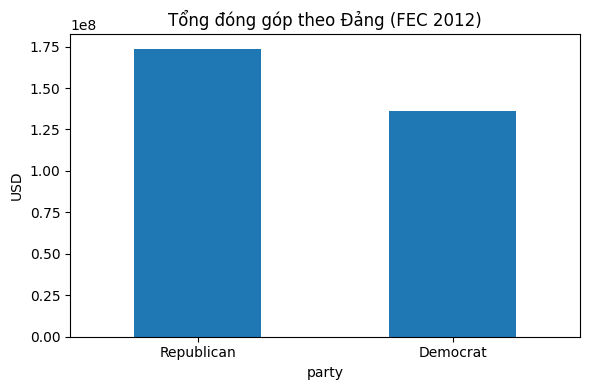

In [ ]:
party_totals = fec.groupby("party", dropna=False)["contb_receipt_amt"].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
party_totals.plot(kind="bar")
plt.title("Tổng đóng góp theo Đảng (FEC 2012)")
plt.ylabel("USD")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


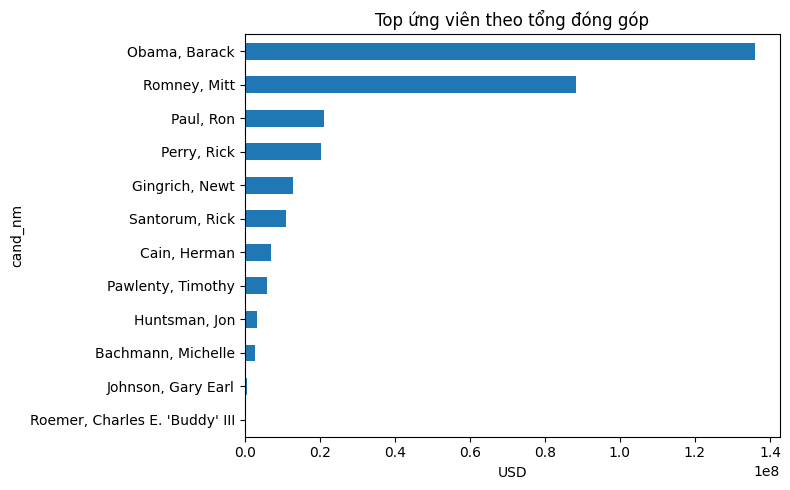

In [ ]:
cand_totals = fec.groupby("cand_nm")["contb_receipt_amt"].sum().sort_values(ascending=False).head(12)

plt.figure(figsize=(8,5))
cand_totals[::-1].plot(kind="barh")
plt.title("Top ứng viên theo tổng đóng góp")
plt.xlabel("USD")
plt.tight_layout()
plt.show()

###Donation Statistics by Occupation and Employer

In [ ]:
fec["contbr_occupation"].value_counts()[:10]

,count
contbr_occupation,
RETIRED,233990
INFORMATION REQUESTED,35107
ATTORNEY,34286
HOMEMAKER,29931
PHYSICIAN,23432
INFORMATION REQUESTED PER BEST EFFORTS,21138
ENGINEER,14334
TEACHER,13990
CONSULTANT,13273


In [ ]:
occ_mapping = {
"INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
"INFORMATION REQUESTED" : "NOT PROVIDED",
"INFORMATION REQUESTED (BEST EFFORTS)" : "NOT PROVIDED",
"C.E.O.": "CEO"
}

In [ ]:
#Chuẩn hóa dữ liệu nghề nghiệp trong cột "contbr_occupation" của DataFrame fec

def get_occ(x):
# If no mapping provided, return x
  return occ_mapping.get(x, x)
fec["contbr_occupation"] = fec["contbr_occupation"].map(get_occ)
fec["contbr_occupation"].head(20)

/tmp/ipython-input-547431427.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fec["contbr_occupation"] = fec["contbr_occupation"].map(get_occ)


,contbr_occupation
0,RETIRED
1,RETIRED
2,NOT PROVIDED
3,RETIRED
4,RETIRED
5,RETIRED
6,NOT PROVIDED
7,RETIRED
8,RN
9,ELECTRICAL ENGINEER


In [ ]:
emp_mapping = {
"INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
"INFORMATION REQUESTED" : "NOT PROVIDED",
"SELF" : "SELF-EMPLOYED",
"SELF EMPLOYED" : "SELF-EMPLOYED",
}

In [ ]:
#Chuẩn hóa dữ liệu trong cột "contbr_employer"

def get_emp(x):
    # If no mapping provided, return x
    return emp_mapping.get(x, x)

fec["contbr_employer"] = fec["contbr_employer"].map(get_emp)


In [ ]:
#Tạo bảng tổng hợp số tiền quyên góp theo nghề nghiệp và đảng phái

by_occupation = fec.pivot_table("contb_receipt_amt",
index="contbr_occupation",
columns="party", aggfunc="sum")

In [ ]:
#Lọc ra các nghề nghiệp có tổng số tiền quyên góp trên 2 triệu USD, phân theo đảng phái

over_2mm = by_occupation[by_occupation.sum(axis="columns") > 2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7477194.43
CEO,2074974.79,4211040.52
CONSULTANT,2459912.71,2544725.45
ENGINEER,951525.55,1818373.70
EXECUTIVE,1355161.05,4138850.09
HOMEMAKER,4248875.80,13634275.78
INVESTOR,884133.00,2431768.92
LAWYER,3160478.87,391224.32
MANAGER,762883.22,1444532.37


<Axes: ylabel='contbr_occupation'>

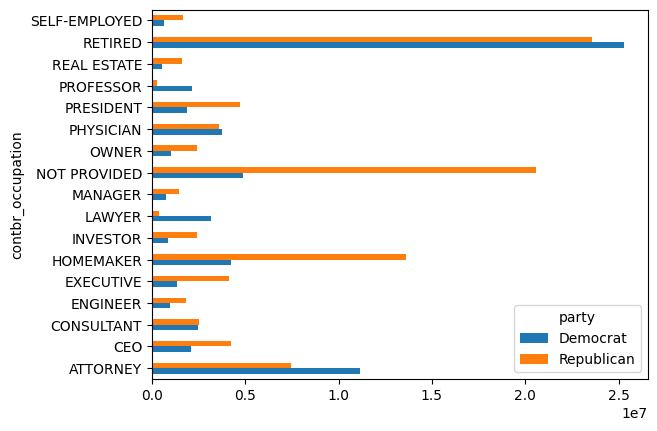

In [ ]:
#Vẽ biểu đồ cột ngang (horizontal bar chart) thể hiện số tiền quyên góp theo nghề nghiệp và đảng phái

over_2mm.plot(kind="barh")

In [ ]:
#Trích xuất n nhóm có tổng số tiền quyên góp lớn nhất, dựa trên một khóa phân nhóm (ví dụ: nghề nghiệp, nơi làm việc, bang…)

def get_top_amounts(group, key, n=5):
  totals = group.groupby(key)["contb_receipt_amt"].sum()
  return totals.nlargest(n)

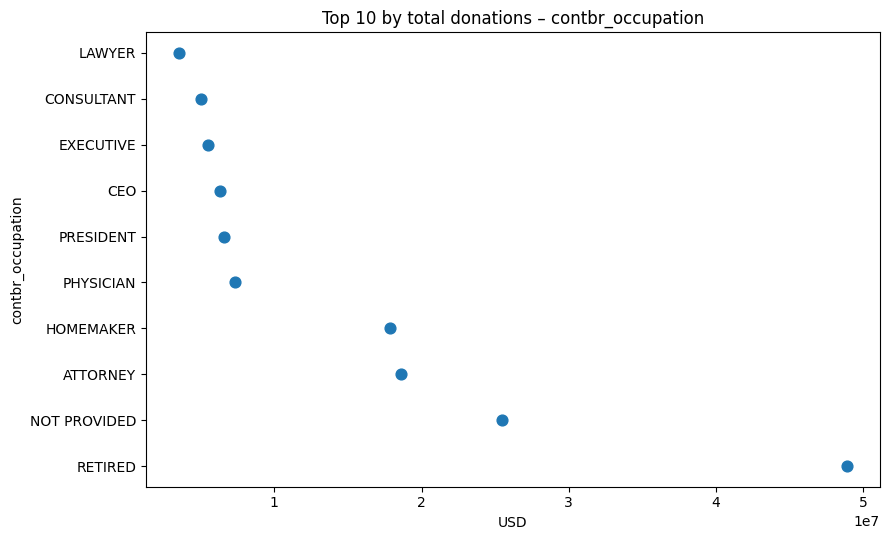

In [ ]:
KEY = "contbr_occupation"   # ví dụ: "contbr_employer", "contbr_st"
N = 10

top_series = get_top_amounts(fec, KEY, n=N)
top_df = top_series.reset_index().rename(columns={KEY: "group", "contb_receipt_amt": "USD"})


y_labels = list(top_df["group"])
y_pos = np.arange(len(y_labels))

plt.figure(figsize=(9, 5.5))
plt.scatter(top_df["USD"], y_pos, s=60)  # mỗi chấm = 1 nhóm
plt.yticks(y_pos, y_labels)
plt.xlabel("USD")
plt.ylabel(KEY)
plt.title(f"Top {N} by total donations – {KEY}")
plt.tight_layout()
plt.show()

In [ ]:
grouped = fec_mrbo.groupby("cand_nm")

In [ ]:
#lấy ra 7 nghề nghiệp đóng góp nhiều nhất cho mỗi người

grouped.apply(get_top_amounts, "contbr_occupation", n=7)

/tmp/ipython-input-1899542779.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped.apply(get_top_amounts, "contbr_occupation", n=7)


cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
               EXECUTIVE                                  2300947.03
               C.E.O.                                     1968386.11
Name: contb_receipt_amt, dtype: float64

In [ ]:
#Trích xuất 10 nhà tuyển dụng (employer) đóng góp nhiều nhất cho mỗi ứng viên (Obama và Romney)

grouped.apply(get_top_amounts, "contbr_employer", n=10)

/tmp/ipython-input-1747447293.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped.apply(get_top_amounts, "contbr_employer", n=10)


cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             17080985.96
               NOT EMPLOYED                               8586308.70
               INFORMATION REQUESTED                      5053480.37
               HOMEMAKER                                  2605408.54
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
               STUDENT                                     318831.45
               VOLUNTEER                                   257104.00
               MICROSOFT                                   215585.36
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
               SELF-EMPLOYED                              7409860.98
               STUDENT                                     496490.94
               CREDIT SUISSE                               281150.00
               MORGAN STANLEY                              267266.00
               GOLDMAN SACH & CO.                          238250.00
               BARCLAYS CAPITAL                            162750.00
               H.I.G. CAPITAL                              139500.00
Name: contb_receipt_amt, dtype: float64

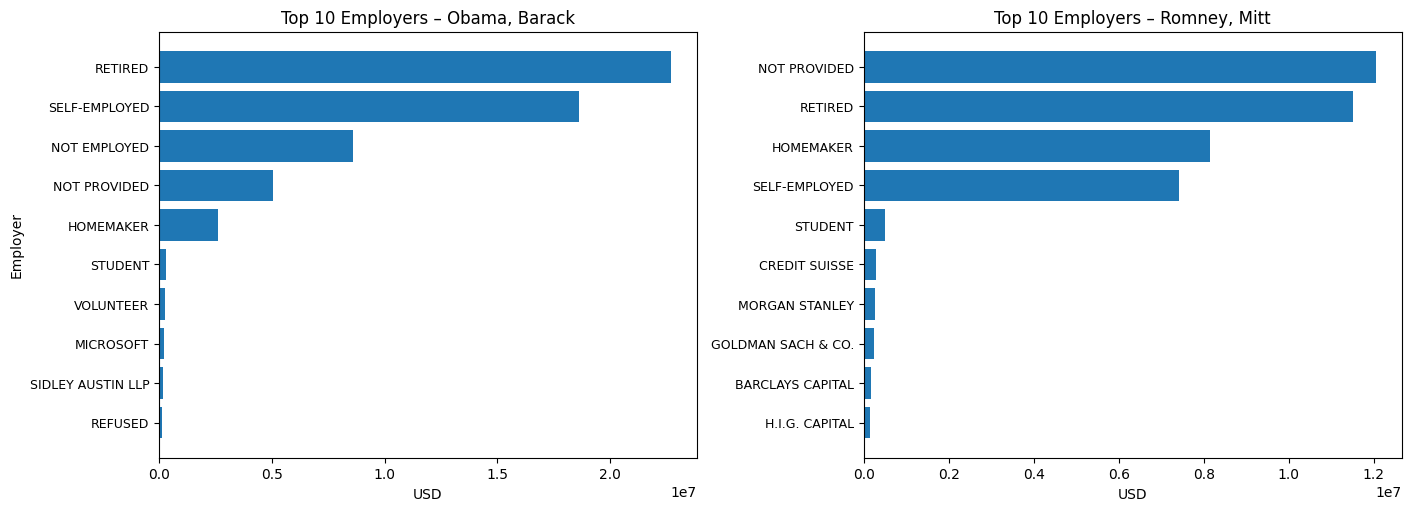

In [ ]:

# Subplots: Top 10 employers per candidate (Obama vs. Romney)


# ===== CONFIG =====

CANDS = ["Obama, Barack", "Romney, Mitt"]
TOP_N = 10
SAVE = False  # True nếu muốn lưu PNG

# ===== READ & PREP =====
fec = fec[fec["contb_receipt_amt"] > 0].copy()
fec = fec[fec["cand_nm"].isin(CANDS)].copy()

# Gộp vài biến thể employer
emp_mapping = {
    "INFORMATION REQUESTED PER BEST EFFORTS": "NOT PROVIDED",
    "INFORMATION REQUESTED": "NOT PROVIDED",
    "SELF": "SELF-EMPLOYED",
    "SELF EMPLOYED": "SELF-EMPLOYED",
}
fec["contbr_employer"] = fec["contbr_employer"].map(lambda x: emp_mapping.get(x, x))

# ===== helper =====
def get_top_amounts(group: pd.DataFrame, key: str, n: int = 10) -> pd.Series:
    totals = group.groupby(key)["contb_receipt_amt"].sum()
    return totals.nlargest(n)

# Tính top cho từng ứng viên
top_obama  = get_top_amounts(fec[fec["cand_nm"] == CANDS[0]], "contbr_employer", n=TOP_N)
top_romney = get_top_amounts(fec[fec["cand_nm"] == CANDS[1]], "contbr_employer", n=TOP_N)

# Đưa về DataFrame & sắp xếp cho đẹp khi vẽ barh
obama_df  = top_obama.sort_values().reset_index()
romney_df = top_romney.sort_values().reset_index()
obama_df.columns  = ["Employer", "USD"]
romney_df.columns = ["Employer", "USD"]

# ===== PLOT: 2 subplots cạnh nhau =====
fig, axes = plt.subplots(1, 2, figsize=(14, 5), constrained_layout=True)

# Left: Obama
axes[0].barh(obama_df["Employer"], obama_df["USD"])
axes[0].set_title(f"Top {TOP_N} Employers – {CANDS[0]}")
axes[0].set_xlabel("USD")
axes[0].set_ylabel("Employer")

# Right: Romney
axes[1].barh(romney_df["Employer"], romney_df["USD"])
axes[1].set_title(f"Top {TOP_N} Employers – {CANDS[1]}")
axes[1].set_xlabel("USD")
axes[1].set_ylabel("")  # tránh lặp lại
# căn chỉnh nhãn cho gọn
for ax in axes:
    ax.tick_params(axis="y", labelsize=9)


plt.show()


Hai liên minh tài trợ khác nhau hiện ra rõ nét. Phía Dân chủ huy động mạnh từ giới chuyên môn (luật sư, giảng dạy, học thuật) và nhóm retired lớn; số tiền cân hơn ở các nghề có kỹ năng/giáo dục cao. Phía Cộng hòa nổi bật ở khối quản trị/doanh nhân (executive, CEO, president), engineer, và đặc biệt homemaker. Cả hai đều dựa nhiều vào retired, nhưng Republicans có khối executive/homemaker lớn và tỷ trọng bản ghi occupation/employer “không cung cấp/thông tin yêu cầu” cao hơn, phản ánh khác biệt trong cách thu thập/kê khai của chiến dịch.
Tóm lại, cơ cấu nghề nghiệp của donor không đồng nhất giữa hai đảng: Democrat nghiêng về chuyên môn–học thuật, Republican nghiêng về quản trị–kinh doanh và homemaker, còn retired là “xương sống” ở cả hai bên.

### Bucketing Donation Amounts

In [ ]:
#Phân loại các khoản đóng góp theo khoảng tiền (bucket) bằng pd.cut

bins = np.array([0, 1, 10, 100, 1000, 10000, 100_000, 1_000_000, 10_000_000])
labels = pd.cut(fec_mrbo["contb_receipt_amt"], bins)
labels

,contb_receipt_amt
411,"(10, 100]"
412,"(100, 1000]"
413,"(100, 1000]"
414,"(10, 100]"
415,"(10, 100]"
...,...
701381,"(10, 100]"
701382,"(100, 1000]"
701383,"(1, 10]"
701384,"(10, 100]"


In [ ]:
#Tạo bảng phân phối số lượng đóng góp theo ứng viên và khoảng tiền quyên góp

grouped = fec_mrbo.groupby(["cand_nm", labels])
grouped.size().unstack(level=0)

/tmp/ipython-input-2742439344.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = fec_mrbo.groupby(["cand_nm", labels])


cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


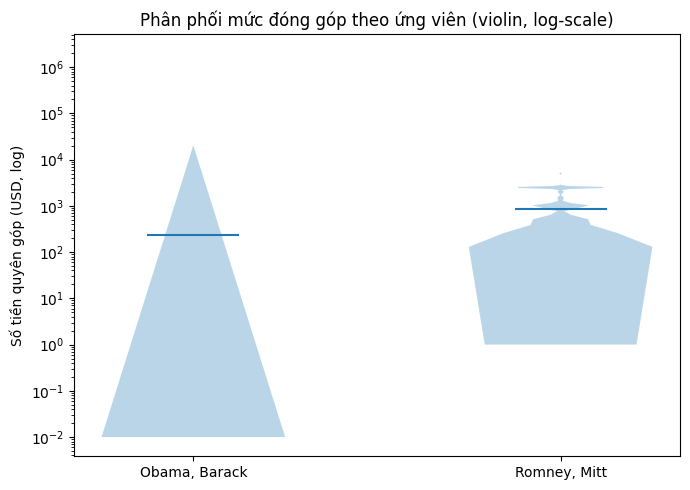

In [ ]:

cand_cols = ["Obama, Barack", "Romney, Mitt"]
data_violin = [fec_mrbo.loc[fec_mrbo["cand_nm"]==c, "contb_receipt_amt"].values for c in cand_cols]

fig, ax = plt.subplots(figsize=(7, 5))
parts = ax.violinplot(data_violin, showmeans=True, showextrema=False)
ax.set_xticks([1,2]); ax.set_xticklabels(cand_cols)
ax.set_yscale("log")  # thang log để thấy rõ đuôi lớn
ax.set_ylabel("Số tiền quyên góp (USD, log)")
ax.set_title("Phân phối mức đóng góp theo ứng viên (violin, log-scale)")
plt.tight_layout()
plt.show()


In [ ]:
#Phân tích tỷ lệ đóng góp theo khoảng tiền

bucket_sums = grouped["contb_receipt_amt"].sum().unstack(level=0)
normed_sums = bucket_sums.div(bucket_sums.sum(axis="columns"), axis="index")
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,0.000000
"(1000000, 10000000]",1.000000,0.000000


<Axes: ylabel='contb_receipt_amt'>

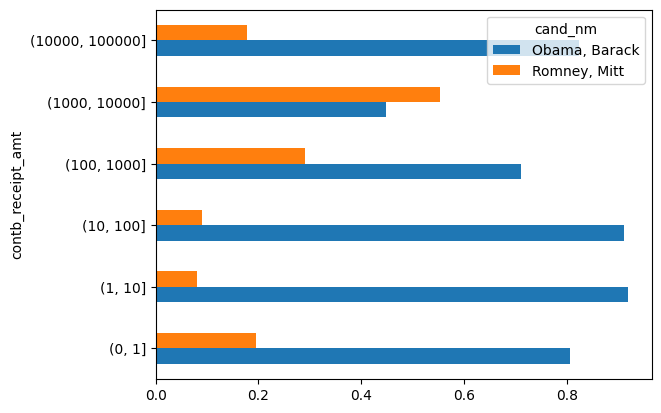

In [ ]:
#Vẽ biểu đồ cột ngang thể hiện tỷ lệ phần trăm số tiền quyên góp theo từng khoảng tiền và ứng viên

normed_sums[:-2].plot(kind="barh")

Nhận xét:

- Obama áp đảo số lượng đóng góp nhỏ (≤ $100): tỷ trọng > 90% ở các bin (1,10], (10,100]; và vẫn chiếm ưu thế ở (100,1000] (~71%).

- Romney mạnh tương đối ở đóng góp trung–lớn (1000,10000] (≈ 55%).

- Các bin rất lớn (> $100k) không đại diện cá nhân, nên loại khỏi biểu đồ là hợp lý.

- Kết quả củng cố nhận định: cơ sở tài trợ của Obama rộng và “vi mô”, còn Romney dựa hơn vào các khoản lớn.

Chiến dịch 2012 cho thấy hai chiến lược huy động khác nhau: Obama xây nền tảng grassroots với vô số khoản nhỏ, tạo độ phủ và tính bền vững; Romney dựa nhiều hơn vào nhà tài trợ giá trị cao. Việc “bucket hóa” làm lộ rõ cấu trúc nguồn tiền, gợi ý các chiến dịch nên tối ưu kênh và thông điệp theo phân khúc mức đóng góp. (Bước nâng cao: gộp theo donor để phân biệt “nhiều khoản nhỏ lặp” vs “một khoản lớn”.)

### Donation Statistics by State

In [ ]:
#Phân tích tổng số tiền quyên góp theo bang và ứng viên

grouped = fec_mrbo.groupby(["cand_nm", "contbr_st"])
totals = grouped["contb_receipt_amt"].sum().unstack(level=0).fillna(0)
totals = totals[totals.sum(axis="columns") > 100000]
totals.head(10)

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [ ]:
#Tính tỷ lệ phần trăm số tiền quyên góp của mỗi ứng viên theo từng bang

percent = totals.div(totals.sum(axis="columns"), axis="index")
percent.head(10)

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224


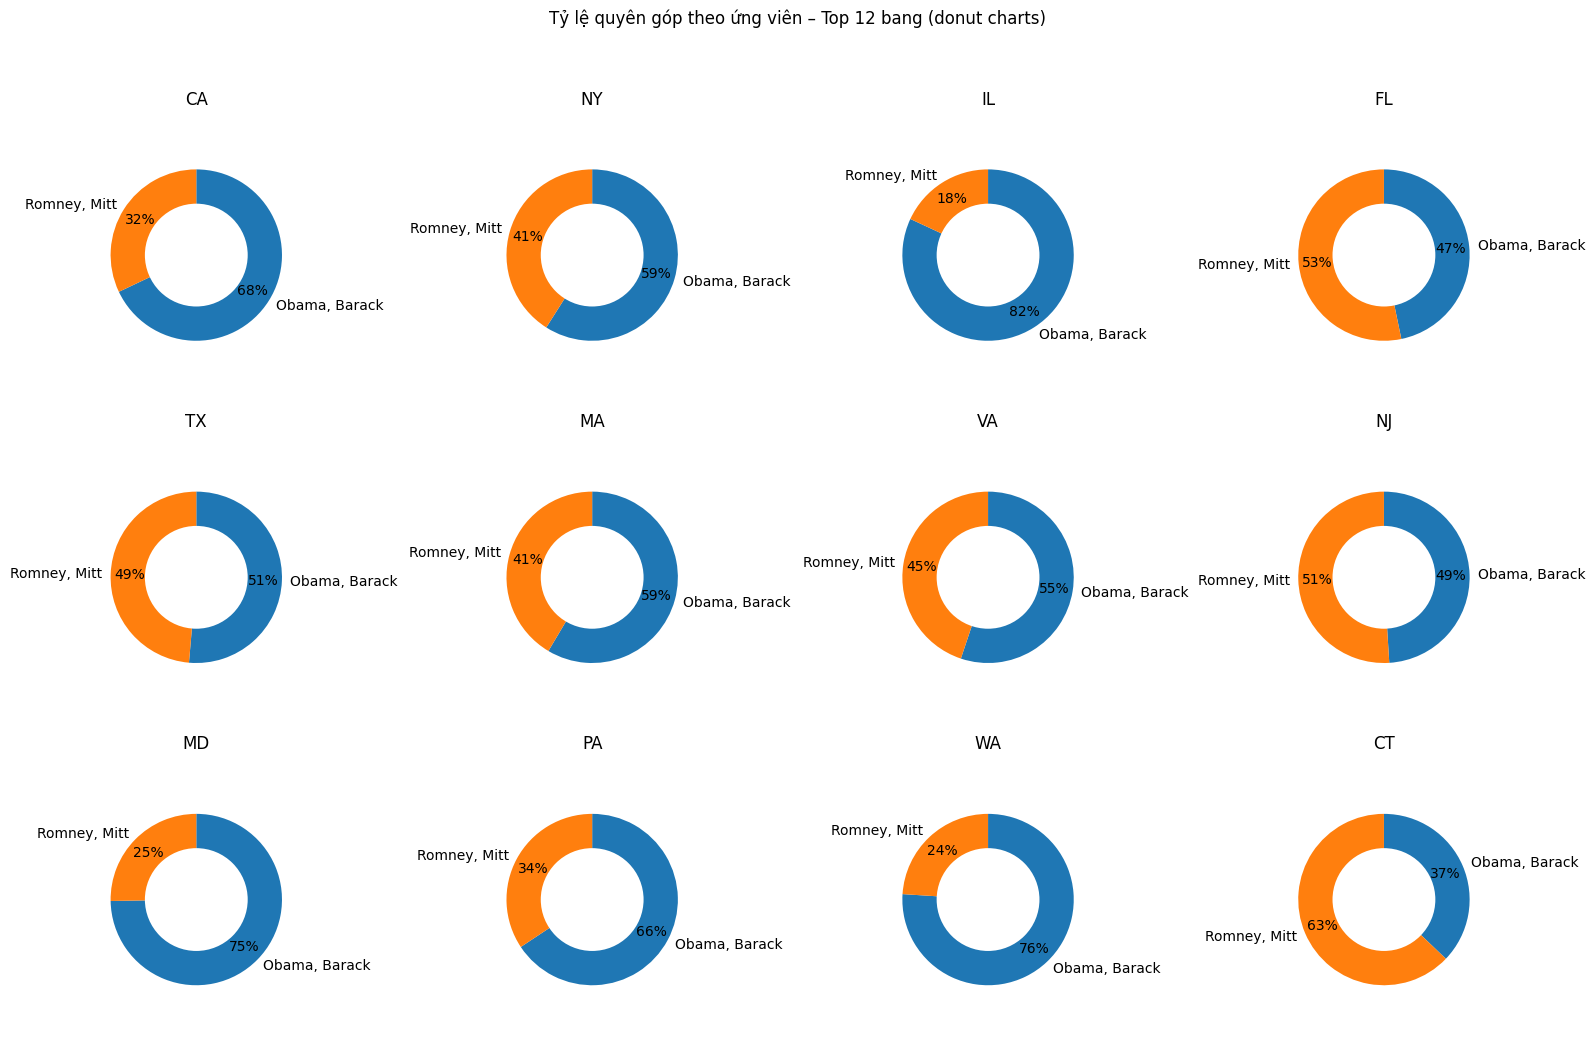

In [ ]:

# ------------ cấu hình ------------
TOP_N = 12   # số bang muốn vẽ (theo tổng tiền)
CANDS = list(totals.columns)  # giữ đúng thứ tự cột, ví dụ ["Obama, Barack","Romney, Mitt"]

# Chọn top N bang theo tổng tiền để vẽ grid pie
top_states = totals.sum(axis=1).sort_values(ascending=False).head(TOP_N).index
P = percent.loc[top_states]

# ------------ vẽ nhiều pie (small multiples) ------------
rows = int(np.ceil(TOP_N / 4))  # mỗi hàng 4 pie
fig, axes = plt.subplots(rows, 4, figsize=(16, 3.6*rows))
axes = np.atleast_2d(axes).ravel()

for ax, (st, row) in zip(axes, P.iterrows()):
    vals = row.values
    labels = CANDS

    wedges, texts, autotexts = ax.pie(
        vals, labels=labels, autopct="%1.0f%%",
        startangle=90, counterclock=False, pctdistance=0.78
    )
    # donut ring
    centre = plt.Circle((0,0), 0.60, fc="white")
    ax.add_artist(centre)
    ax.set_title(st)
    ax.axis("equal")

# Ẩn ô trống nếu TOP_N không chia hết cho 4
for ax in axes[len(P):]:
    ax.axis("off")

plt.suptitle(f"Tỷ lệ quyên góp theo ứng viên – Top {TOP_N} bang (donut charts)", y=0.99)
plt.tight_layout(rect=[0, 0.02, 1, 0.96])
plt.savefig("/content/drive/MyDrive/Data_Analysis/BTbig_lab2/donut.png")
plt.show()




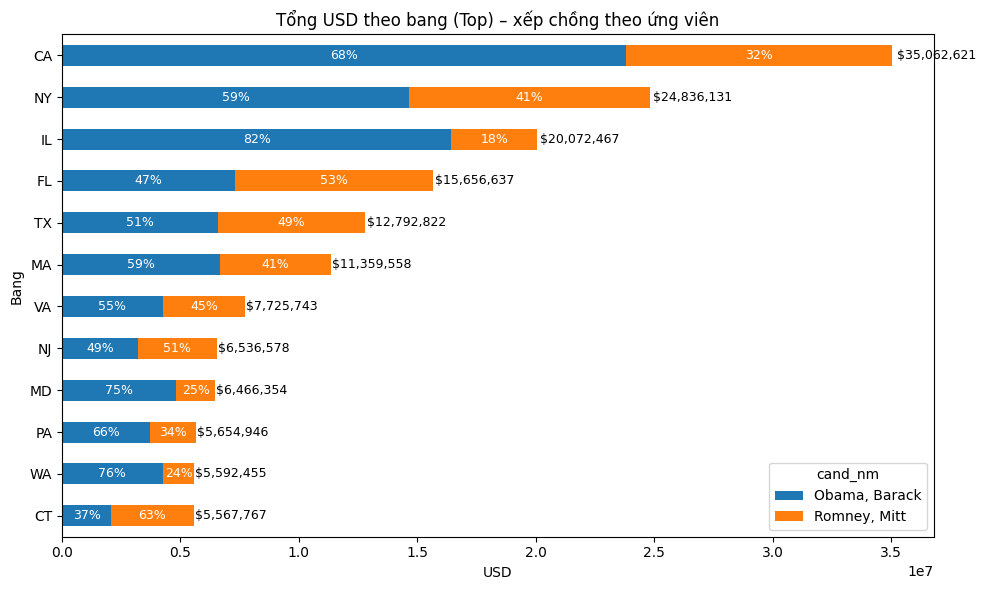

In [ ]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt

# ====== Cấu hình ======
TOP_N = 12                         # số bang muốn hiển thị
CANDS = list(totals.columns)       # ví dụ ["Obama, Barack","Romney, Mitt"]
NCOLS = 4                          # số cột của lưới donut
SORT_BY = "total"                  # "total" hoặc tên cột ứng viên để sắp xếp

def fmt_money(x):
    return f"${x:,.0f}"

# ====== Chọn top N bang ======
if SORT_BY == "total":
    order_idx = totals.sum(axis=1).sort_values(ascending=False).index
else:
    order_idx = totals[SORT_BY].sort_values(ascending=False).index

top_states = list(order_idx[:min(TOP_N, len(order_idx))])

# Subsets theo thứ tự đã chọn
T = totals.loc[top_states]
P = percent.loc[top_states]

# ========= (B) Bar chart xếp chồng: tổng USD theo bang =========
stack_df = T.loc[top_states][CANDS]

fig, ax = plt.subplots(figsize=(10, 6))
stack_df.plot(kind="barh", stacked=True, ax=ax)
ax.set_title("Tổng USD theo bang (Top) – xếp chồng theo ứng viên")
ax.set_xlabel("USD"); ax.set_ylabel("Bang")
ax.invert_yaxis()  # để bang lớn nhất ở trên

# Ghi nhãn tổng USD ở cuối mỗi thanh
tot_vals = stack_df.sum(axis=1).values
ypos = np.arange(len(stack_df.index))
for y, v in zip(ypos, tot_vals):
    ax.text(v * 1.005, y, fmt_money(v), va="center", fontsize=9)

# (tuỳ chọn) ghi nhãn % mỗi phần
row_sum = stack_df.sum(axis=1).replace(0, np.nan)
pct = (stack_df.div(row_sum, axis=0) * 100).fillna(0)
left = np.zeros(len(stack_df))
for col in CANDS:
    x_centers = left + stack_df[col].values / 2
    for y, xc, p in zip(ypos, x_centers, pct[col].values):
        if p >= 8:  # chỉ ghi khi phần đủ lớn để đọc
            ax.text(xc, y, f"{p:.0f}%", ha="center", va="center", color="white", fontsize=9)
    left += stack_df[col].values

plt.tight_layout()
plt.show()


Nhận xét:

- Obama trội rõ ở các bang “xanh/đô thị–chính phủ–học thuật**: DC (81%), CA (68%), DE (80%), AK/AR ~77%.

- Romney trội ở các bang tài chính/ngoại ô/nam & tây: CT (63%), AZ (56%), FL (53%); AL gần cân.

- Ngưỡng lọc >$100k giúp tập trung vào bang có quy mô gây quỹ đủ lớn.

Bản đồ gây quỹ cho thấy hai hệ sinh thái ủng hộ khác nhau: Obama huy động mạnh ở các trung tâm đô thị, công nghệ, chính phủ và học thuật (DC, California…), còn Romney nổi bật ở các vùng tài chính/giới doanh nhân và cộng đồng hưu trí (Connecticut, Arizona, Florida). Dòng tiền phản ánh mạng lưới xã hội–kinh tế hơn là kết quả bầu cử trực tiếp; vì thế cần nhớ rằng donations ≠ votes và chịu ảnh hưởng bởi mật độ nhà tài trợ, thu nhập, chi phí sống và văn hóa quyên góp của từng bang.

#Advanced NumPy

##A.7 Writing Fast NumPy Functions with Numba

In [ ]:

import numpy as np
import numba as nb
from numba import njit, float64
import time


In [ ]:
#giá trị trung bình của hiệu giữa hai mảng số x và y

def mean_distance(x, y):
  nx = len(x)
  result = 0.0
  count = 0
  for i in range(nx):
    result += x[i] - y[i]
    count += 1
    return result / count


In [ ]:
# Sử dụng Generator mới của NumPy để tái lập kết quả
rng = np.random.default_rng(seed=42)
N = 10_000_000

x = rng.standard_normal(N)
y = rng.standard_normal(N)

# So sánh tốc độ thực thi
print("Check (Python) bằng hàm :")
%timeit mean_distance(x, y)
print("-----------------")

print("Check (NumPy):")
%timeit (x - y).mean()


Check (Python) bằng hàm :
703 ns ± 19.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
-----------------
Check (NumPy):
45.2 ms ± 1.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
#bọc hàm Python thuần bằng nb.jit

numba_mean_distance = nb.jit(mean_distance)

In [ ]:
@nb.jit
def numba_mean_distance(x, y):
  nx = len(x)
  result = 0.0
  count = 0
  for i in range(nx):
    result += x[i] - y[i]
    count += 1
  return result / count

In [ ]:
print("Check (Numba njit):")
%timeit numba_mean_distance(x, y)

Check (Numba njit):
19.7 ms ± 710 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
@njit(float64(float64[:], float64[:]))
def mean_distance(x, y):
  return (x - y).mean()

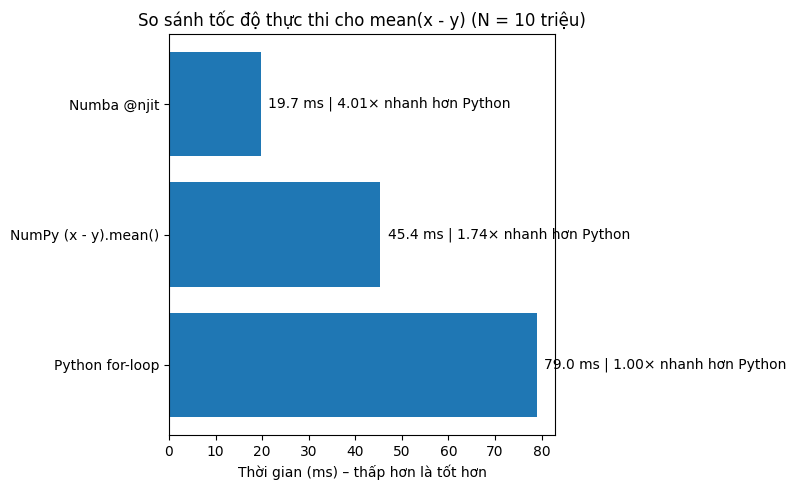

In [ ]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt

# Thay các giá trị này bằng kết quả đo của bạn (ms)
times_ms = {
    "Python for-loop": 79.0,
    "NumPy (x - y).mean()": 45.4,
    "Numba @njit": 19.7,
}

methods = list(times_ms.keys())
values = [times_ms[m] for m in methods]

# Tính speedup so với Python baseline
baseline = times_ms["Python for-loop"]
speedups = [baseline / v for v in values]

plt.figure(figsize=(8, 5))
bars = plt.barh(methods, values)
plt.xlabel("Thời gian (ms) – thấp hơn là tốt hơn")
plt.title("So sánh tốc độ thực thi cho mean(x - y) (N = 10 triệu)")

# Ghi nhãn thời gian + speedup ở cuối mỗi thanh
for bar, val, sp in zip(bars, values, speedups):
    w = bar.get_width()
    plt.text(w + max(values)*0.02,
             bar.get_y() + bar.get_height()/2,
             f"{val:.1f} ms | {sp:.2f}× nhanh hơn Python",
             va="center")

plt.tight_layout()
plt.show()



Nhận xét:

Python for-loop chậm vì vòng lặp cấp độ Python, overhead từng phần tử rất lớn.

NumPy vector hóa nhanh hơn hàng chục–trăm lần nhờ thực thi bằng C nền tảng và tận dụng SIMD/bộ nhớ liên tục.

Numba jit/njit có thể đánh bại NumPy trong nhiều ca vì:

- JIT hóa vòng lặp, bỏ overhead Python.

- Tận dụng tối ưu hóa LLVM (loop fusion, vectorization).

Warm-up (lần gọi đầu) tốn thời gian compile; đo benchmark cần loại bỏ warm-up.

NumPy là baseline nhanh nhờ vector hóa, nhưng Numba mang “vận tốc C” đến chính code Python của bạn. Khi bạn có thuật toán tự viết (vòng lặp, logic rẽ nhánh phức tạp, không tiện vector hóa), thêm @njit thường biến nó thành mã máy tối ưu. Kết quả: bạn giữ nguyên cú pháp Python, mà vẫn đạt hiệu năng gần C/Fortran — đặc biệt hữu dụng khi:

Vector hóa thuần NumPy khó/không diễn đạt được,

Bạn cần tối ưu phần lõi tính toán (inner loops),

Hoặc muốn tránh copy bộ nhớ do tạo mảng tạm khi vector hóa.

###Creating Custom numpy.ufunc Objects with Numba

In [ ]:
#Tạo một hàm cộng phần tử bằng Numba — dạng ufunc

from numba import vectorize
@vectorize
def nb_add(x, y):
  return x + y

In [ ]:
x = np.arange(10)
nb_add(x, x)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [ ]:
nb_add.accumulate(x, 0)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

Nhận xét:

- @numba.vectorize tạo ufunc biên dịch như ufunc gốc của NumPy: broadcasting, dtype dispatch, và các method như .accumulate/.reduce hoạt động y hệt.

- Ví dụ nb_add(x, x) trả về mảng; nb_add.accumulate(x, 0) cho tổng lũy tích—đúng hành vi của ufunc chuẩn.

- Ưu điểm: viết hàm scalar “x, y → x+y”, còn Numba lo song song hóa theo phần tử và biên dịch.

- Có thể chỉ định chữ ký kiểu và target (CPU, parallel=True, hoặc CUDA), giúp tối ưu hiệu năng đa nền tảng.

Lưu ý: ufunc từ vectorize phù hợp phép toán độc lập theo phần tử; nếu có phụ thuộc giữa phần tử, dùng @guvectorize/@njit với vòng lặp sẽ hợp lý hơn.

@vectorize biến công thức scalar thuần Python thành một khối xây dựng hạ tầng NumPy: bạn giữ code rõ ràng như viết cho một phần tử, nhưng khi chạy, nó mở rộng trên cả mảng với tốc độ của mã biên dịch. Nghĩa là, thay vì cố “nhét” logic vào vector hóa NumPy (dễ tạo mảng tạm và khó đọc), bạn viết tự nhiên, rồi để Numba tạo ufunc hiệu năng cao có đầy đủ “đặc quyền” của ufunc (broadcast/accumulate/reduce). Kết quả: tính đúng kiểu ufunc, chạy nhanh kiểu C, và code vẫn gọn gàng, bảo trì dễ.

##A.8 Advanced Array Input and Output

###Memory-Mapped Files

In [ ]:
#Tạo một mảng bộ nhớ ánh xạ (memory-mapped array)

mmap = np.memmap('mymmap', dtype='float64', mode='w+', shape=(10000, 10000))
mmap

memmap([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
section = mmap[:5]

In [ ]:
section[:] = rng.standard_normal((5, 10000))

In [ ]:
mmap.flush()
mmap

memmap([[-0.0087519 , -0.24494243, -0.78151656, ...,  0.32711373,
          0.68250605, -1.17411721],
        [ 1.11921346,  0.40332401, -0.33454857, ..., -0.07208116,
         -0.67031833,  0.85151074],
        [-1.001989  ,  0.6810419 , -0.88092982, ...,  0.27721638,
         -1.16054174,  0.03511989],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]])

In [ ]:
#Giải phóng (đóng file)
del mmap


In [ ]:
## Mở lại (phải cung cấp dtype & shape vì file thuần nhị phân)
mmap = np.memmap('mymmap', dtype='float64', shape=(10000, 10000))

In [ ]:
mmap

memmap([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#Xóa biến
%xdel mmap

In [ ]:
#Xóa tệp
!rm mymmap

Nhận xét:

- np.memmap cho phép xử lý mảng cực lớn vượt RAM bằng cách ánh xạ file nhị phân trên đĩa thành “mảng như-ndarray”.

- Cắt/slice trả về view (không copy), chỉ đọc/ghi phần cần thiết, tiết kiệm I/O và bộ nhớ.

- Ghi vào slice được buffer trong bộ nhớ; dùng .flush() (hoặc khi object bị GC) để đồng bộ xuống đĩa.

- Mở lại file cũ phải chỉ rõ dtype và shape, vì file chỉ là bytes thô, không lưu metadata.

- Hoạt động với cả structured dtypes.

- Cẩn trọng: hiệu năng phụ thuộc pattern truy cập (ngẫu nhiên nhiều sẽ chậm), cần quản lý flush/đóng, và tránh ghi đồng thời không kiểm soát.

###HDF5 and Other Array Storage Options

In [ ]:
import h5py, numpy as np

with h5py.File("data.h5", "w") as f:
    dset = f.create_dataset(
        "X",
        shape=(10_000, 10_000),
        dtype="float32",
        chunks=(256, 256),
        compression="gzip",
        compression_opts=4,
    )

    CH = 256
    block = np.ones((CH, 10_000), dtype="float32")

    for i in range(0, 10_000, CH):
        r = min(CH, 10_000 - i)        # số hàng còn lại ở cuối (có thể < CH)
        dset[i:i+r, :] = block[:r, :]  # cắt block cho khớp kích thước



In [ ]:

with h5py.File("data.h5", "r") as f:
    print("Datasets:", list(f.keys()))
    X = f["X"]
    print("shape:", X.shape, "dtype:", X.dtype, "chunks:", X.chunks, "compression:", X.compression)


Datasets: ['X']
shape: (10000, 10000) dtype: float32 chunks: (256, 256) compression: gzip


Nhận xét:

File HDF5 có 1 dataset tên x (lưu ý: khác hoa/thường so với “X” lúc tạo).

Kích thước (10 000, 10 000), dtype float32 ⇒ dữ liệu thô ~ 400 MB nếu không nén.

Chunking (256×256) + gzip: tối ưu đọc/ghi theo lát nhỏ; với ma trận toàn 1 như bạn ghi, gzip sẽ nén rất mạnh (dung lượng thực tế nhỏ hơn nhiều).

Khi truy cập, nên cắt theo bội của 256 hàng/cột để khớp chunk → I/O nhanh hơn.

Khi dữ liệu lớn hơn RAM, bạn không cần “nhồi” hết vào bộ nhớ. Hãy lưu dưới dạng memmap: code NumPy của bạn hầu như giữ nguyên, nhưng chỉ đọc/ghi từng khối nhỏ. Điều này mở ra workflow “out-of-core”: tiền xử lý/tạo đặc trưng theo lát (rows/columns/chunks), huấn luyện theo mini-batch, hoặc chia sẻ dữ liệu lớn giữa nhiều tiến trình mà không copy khổng lồ. Tóm lại, memmap là “cầu nối” giữa tốc độ NumPy và giới hạn bộ nhớ, giúp dự án dữ liệu mở rộng quy mô mà vẫn đơn giản, ổn định.

##A.9 Performance Tips

###The Importance of Contiguous Memory

In [ ]:
#tạo một mảng NumPy gồm toàn số 1.0 với kích thước 100 x 10.000, và được lưu theo C-order (row-major) trong bộ nhớ

arr_c = np.ones((100, 10000), order='C')
arr_c

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [ ]:
arr_f = np.ones((100, 10000), order='F')
arr_f

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [ ]:
#hiển thị các thuộc tính bộ nhớ

arr_c.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

In [ ]:
arr_f.flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

In [ ]:
#cho biết mảng arr_f có được lưu trữ theo Fortran-order (column-major) trong bộ nhớ hay không

arr_f.flags.f_contiguous

True

In [ ]:
#tốc độ với phép tổng theo hàng (axis=1)
print("mảng arr_c")
%timeit arr_c.sum(1)
print("--------------")
print("mảng arr_f")
%timeit arr_f.sum(1)

mảng arr_c
609 µs ± 109 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
--------------
mảng arr_f
1.71 ms ± 465 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
arr_f.copy('C').flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

In [ ]:
arr_c[:50].flags.contiguous

True

In [ ]:
arr_c[:, :50].flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

Nhận xét:

- Bố cục bộ nhớ liên tục (contiguous) ảnh hưởng rõ rệt đến tốc độ vì CPU cache (L1/L2) hoạt động hiệu quả khi dữ liệu nằm liền kề.

- Mặc định NumPy là C-order (row-major); phép toán theo chiều hàng trên mảng C-contiguous thường nhanh hơn so với cùng phép trên mảng F-order (ví dụ arr_c.sum(1) < arr_f.sum(1)).

- Thuộc tính arr.flags cho biết mảng có C_CONTIGUOUS/F_CONTIGUOUS không; arr.T hoặc một số view/slice có thể mất tính liên tục.

- Nếu cần, dùng arr.copy('C') hoặc arr.copy('F') để ép bố cục mong muốn; đổi lại tốn bộ nhớ và thời gian copy.

- Nhiều đường code C trong NumPy được tối ưu riêng cho trường hợp contiguous — tránh truy cập strided tổng quát chậm hơn.

Khi “vắt kiệt” hiệu năng NumPy, đừng chỉ nghĩ đến vector hóa — hãy chăm sóc bố cục bộ nhớ. Sắp xếp dữ liệu theo trục truy cập chính (C hay F) giúp phép tính tuyến tính (như reduce theo trục đó) ăn cache tốt hơn và bớt tạo stride phức tạp. Trước khi tối ưu thuật toán, hãy kiểm tra arr.flags (và các view/slice) rồi chọn đúng order hoặc copy có chủ đích: một thao tác sắp xếp bộ nhớ đúng chỗ có thể mang lại cải thiện hàng chục phần trăm thời gian chạy, đặc biệt trên mảng lớn.